Loading Dataset

In [ ]:
!unrar x /content/drive/MyDrive/fastai.rar

Streaming output truncated to the last 5000 lines.
Extracting  fastai/train/River/River_1451.jpg                             93%  OK 
Extracting  fastai/train/River/River_1452.jpg                             93%  OK 
Extracting  fastai/train/River/River_1453.jpg                             93%  OK 
Extracting  fastai/train/River/River_1454.jpg                             93%  OK 
Extracting  fastai/train/River/River_1455.jpg                             93%  OK 
Extracting  fastai/train/River/River_1456.jpg                             93%  OK 
Extracting  fastai/train/River/River_1457.jpg                             93%  OK 
Extracting  fastai/train/River/River_1458.jpg                             93%  OK 
Extracting  fastai/train/River/River_1459.jpg                             93%  OK 
Extracting  fastai/train/River/River_146.jpg                              93%  OK 
Extracting  fastai/train/Rive

All the Libraries used in the project

In [ ]:
import os
import torch.nn as nn

from fastai.vision.all import *
from fastai.vision import *
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
DATASET_PATH = '/content/fastai/train'

All the Classes for Classification

In [ ]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [ ]:
class_names

['Residential',
 '.ipynb_checkpoints',
 'PermanentCrop',
 'Industrial',
 'River',
 'SeaLake',
 'Highway',
 'AnnualCrop',
 'Forest',
 'Pasture',
 'HerbaceousVegetation']

In [ ]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name=class_names[i]
    image_names=os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

Defining Data Frame

In [ ]:
df = pd.DataFrame(
{
    'name': image_paths,
    'label': labels
})

In [ ]:
df.head()

,name,label
0,/content/fastai/train/Residential/Residential_1471.jpg,0
1,/content/fastai/train/Residential/Residential_995.jpg,0
2,/content/fastai/train/Residential/Residential_2414.jpg,0
3,/content/fastai/train/Residential/Residential_2190.jpg,0
4,/content/fastai/train/Residential/Residential_1400.jpg,0


Converting DataFrame to Labels.csv

In [ ]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

Defining Data Loader with preprocessing parameters

In [ ]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(64),
    bs=32,
    splitter=RandomSplitter(),
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    valid_pct=0.2,
    seed=45,
    shuffle=True,
    flip_vert=True,
    max_zoom=1.2
)

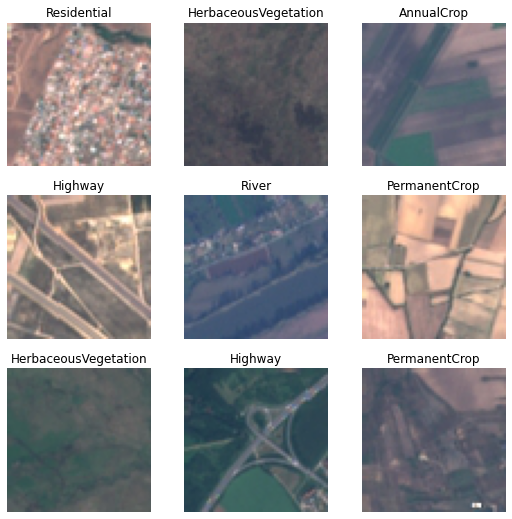

In [ ]:
dls.show_batch()

In [ ]:
#CNN Network
class ConvNet(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) +1
        
        #Input shape= (256,3,64,64)
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,64,64)
        self.bn1=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,64,64)
        self.relu1=nn.ReLU()
        #Shape= (256,32,64,64)
        
        self.pool1=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,32,32,32)
        
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
        #Shape= (256,64,32,32)
        self.bn2=nn.BatchNorm2d(num_features=64)
        self.relu2=nn.ReLU()
        #Shape= (256,64,32,32)
        self.drop = nn.Dropout2d(p=0.2)

        self.conv3=nn.Conv2d(in_channels=64,out_channels=96,kernel_size=3,stride=1,padding=1)
        #Shape= (256,96,32,32)
        self.bn3=nn.BatchNorm2d(num_features=96)
        #Shape= (256,96,32,32)
        self.relu3=nn.ReLU()
        #Shape= (256,96,32,32)
        self.pool2=nn.MaxPool2d(kernel_size=2)
        #Shape= (256,96,16,16)

        self.conv4=nn.Conv2d(in_channels=96,out_channels=128,kernel_size=3,stride=1,padding=1)
        #Shape= (256,128,16,16)
        self.bn4=nn.BatchNorm2d(num_features=128)
        #Shape= (256,128,16,16)
        self.relu4=nn.ReLU()
        #Shape= (256,128,16,16)
        
        self.conv5=nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1)
        #Shape= (256,256,16,16)
        self.bn5=nn.BatchNorm2d(num_features=256)
        #Shape= (256,256,16,16)
        self.relu5=nn.ReLU()
        #Shape= (256,256,16,16)

        self.conv6=nn.Conv2d(in_channels=256,out_channels=96,kernel_size=3,stride=1,padding=1)
        #Shape= (256,96,16,16)
        self.bn6=nn.BatchNorm2d(num_features=96)
        #Shape= (256,96,16,16)
        self.relu6=nn.ReLU()
        #Shape= (256,96,16,16)

        self.pool3=nn.MaxPool2d(kernel_size=2)
        #Shape= (256,96,8,8)

        self.conv7=nn.Conv2d(in_channels=96,out_channels=64,kernel_size=3,stride=1,padding=1)
        #Shape= (256,64,8,8)
        self.bn7=nn.BatchNorm2d(num_features=64)
        #Shape= (256,64,8,8)
        self.relu7=nn.ReLU()
        #Shape= (256,64,8,8)

        
        self.fc1=nn.Linear(in_features=64 * 8 * 8,out_features=256)
        self.fc2=nn.Linear(in_features=256,out_features=128)
        self.fc3=nn.Linear(in_features=128,out_features=64)
        self.fc4=nn.Linear(in_features=64,out_features=32)
        self.fc5=nn.Linear(in_features=32,out_features=num_classes)
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)     
        output=self.pool1(output)     
        output=self.conv2(output)
        output=self.bn2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=self.pool2(output)
        output=self.conv4(output)
        output=self.bn4(output)
        output=self.relu4(output)
        output=self.conv5(output)
        output=self.bn5(output)
        output=self.relu5(output)
        output=self.conv6(output)
        output=self.bn6(output)
        output=self.relu6(output)
        output=self.pool3(output)
        output=self.conv7(output)
        output=self.bn7(output)
        output=self.relu7(output)
      
            
#Above output will be in matrix form, with shape (256,512,8,8)
            
        output=output.view(-1,64*8*8)  #Flatten()
            
        output=self.fc1(output)
        output=self.fc2(output)
        output=self.fc3(output)
        output=self.fc4(output)
        output=self.fc5(output) 
        # output=self.fc6(output)
        # output=self.fc7(output) 
        # output=self.fc8(output)
        # output=self.fc9(output)   
        return torch.log_softmax(output, dim=1)

In [ ]:
model=ConvNet(num_classes=10)

Defining Learner object with metrices as accuracy and ROCauc

In [ ]:
learn = Learner(dls, model, metrics=[accuracy,RocAuc(multi_class='ovr')])

In [ ]:
learn.summary()

ConvNet (Input shape: 32 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 32 x 64 x 64   
Conv2d                                    896        True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 32 x 32 x 32   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 64 x 32 x 32   
Conv2d                                    18496      True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 96 x 32 x 32   
Conv2d                                    55392  

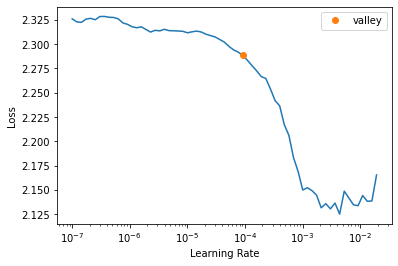

In [ ]:
#Finding Learning Rate
lr1 = learn.lr_find()

In [ ]:
lr1

SuggestedLRs(valley=9.120108734350652e-05)

In [ ]:
#Clearing GPU Memory
import gc
gc.collect()
torch.cuda.empty_cache()

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.576006,0.545646,0.803148,0.980664,00:52
1,0.422369,0.410783,0.857407,0.988670,00:50
2,0.275638,0.283453,0.903518,0.995061,00:53
3,0.205074,0.209490,0.925185,0.996936,00:55
4,0.152852,0.171318,0.939074,0.997620,00:51


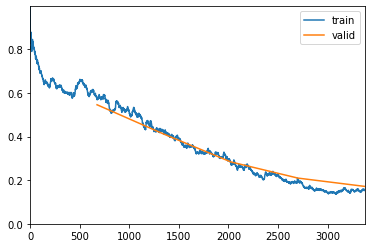

In [ ]:
#Training using Fit_One_Cycle
learn.fit_one_cycle(5,lr1,cbs=[ShowGraphCallback()])

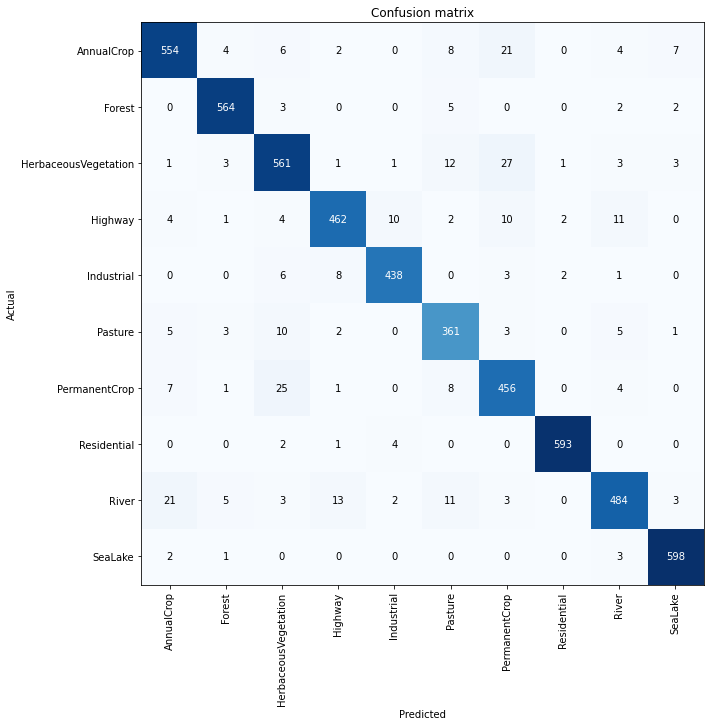

In [ ]:
#Confusin Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,10))

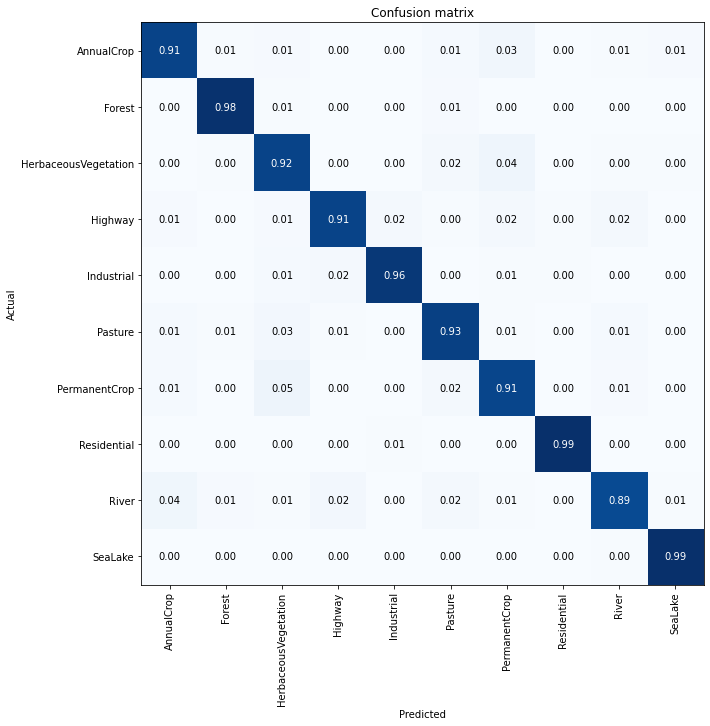

In [ ]:
#Normalized Confusion Matrix
interp1 = ClassificationInterpretation.from_learner(learn)
interp1.plot_confusion_matrix(figsize=(15,10),normalize=True)

In [ ]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9390740990638733 %.


For Finding and Plotting ROC curve and AUC score

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

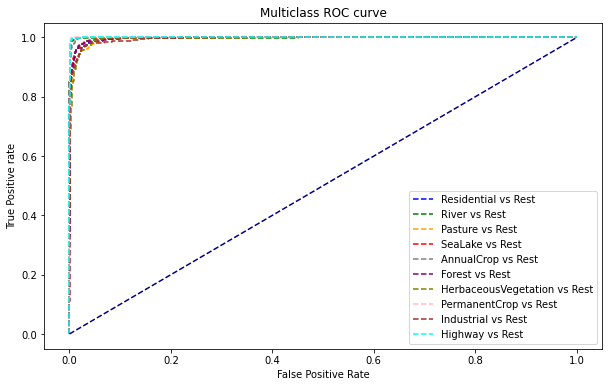

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, preds[:,i], pos_label=i)
    
# plotting   
plt.figure(figsize=(10,6)) 
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Residential vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='River vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Pasture vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='SeaLake vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='gray', label='AnnualCrop vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Forest vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='olive', label='HerbaceousVegetation vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='PermanentCrop vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='brown', label='Industrial vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Highway vs Rest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Multiclass ROC',dpi=300);

ROC Curve for complete Model 

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.999025236951815


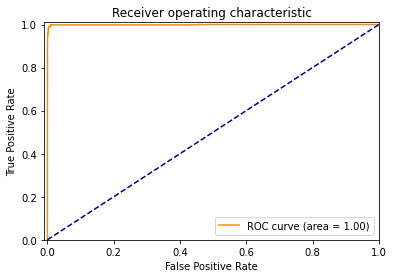

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Prediction of Image

('River',
 tensor(8),
 tensor([9.7234e-08, 1.5760e-08, 7.6018e-08, 1.5828e-06, 4.1523e-06, 5.8875e-08,
         2.9868e-10, 1.0129e-13, 9.9502e-01, 4.9773e-03]))

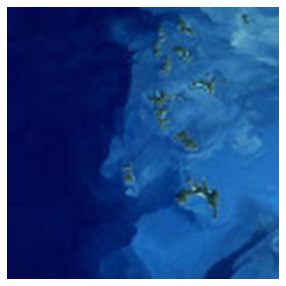

In [ ]:
img_fn = '/content/fastai/2.jpg'
img = PILImage.create(img_fn)
img.show(figsize=(5,5))
learn.predict(
    item=img_fn
)